In [ ]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

Loading Data and Spliting Dataset

In [ ]:
# Load dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Function to plot predictions
def plot_predictions(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    sns.lineplot(x=y_test, y=y_test, color='red')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(title)
    plt.show()

Linear Regression MSE: 0.5558915986952422


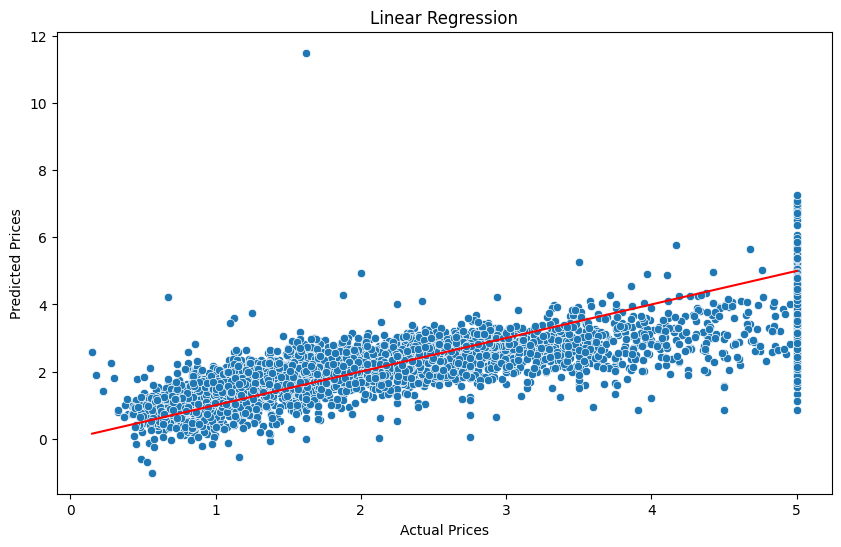

In [ ]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred)}')
plot_predictions(y_test, y_pred, 'Linear Regression')

Decision Tree Regressor MSE: 0.4875656580706879


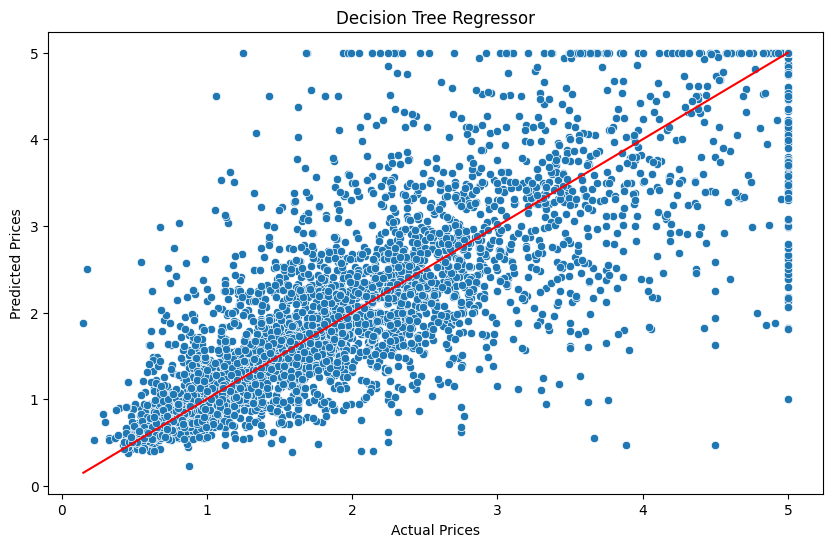

In [ ]:
# Decision Tree Regressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
print(f'Decision Tree Regressor MSE: {mean_squared_error(y_test, y_pred)}')
plot_predictions(y_test, y_pred, 'Decision Tree Regressor')

Random Forest Regressor MSE: 0.25537931485519316


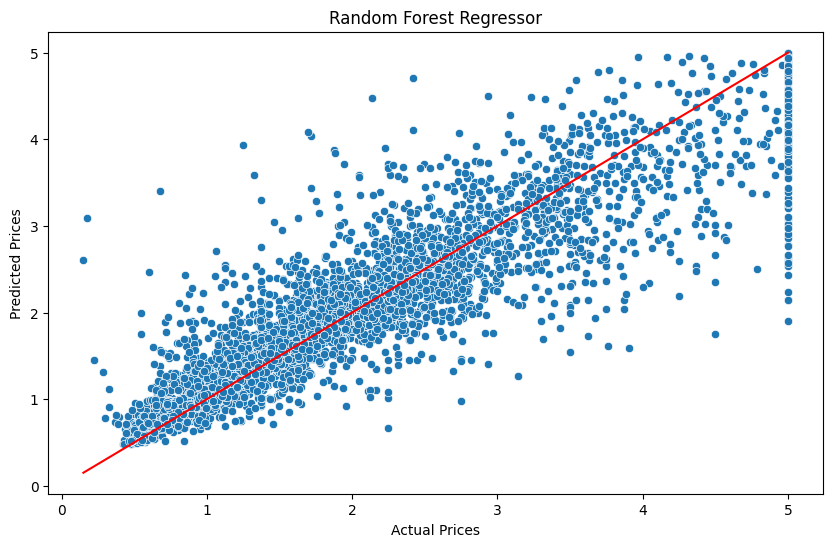

In [ ]:
# Random Forest Regressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)
print(f'Random Forest Regressor MSE: {mean_squared_error(y_test, y_pred)}')
plot_predictions(y_test, y_pred, 'Random Forest Regressor')

SVR MSE: 1.3320115421348744


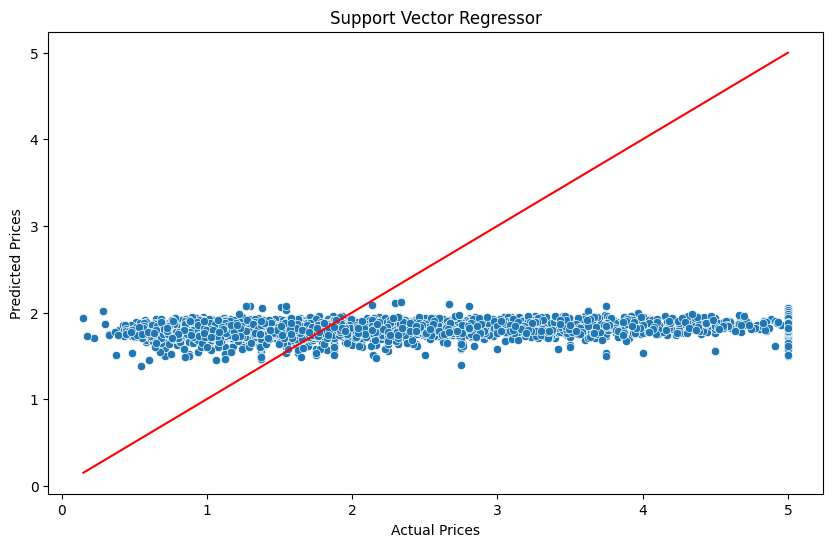

In [ ]:
# Support Vector Regressor
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print(f'SVR MSE: {mean_squared_error(y_test, y_pred)}')
plot_predictions(y_test, y_pred, 'Support Vector Regressor')

KNN Regressor MSE: 1.1186823858768293


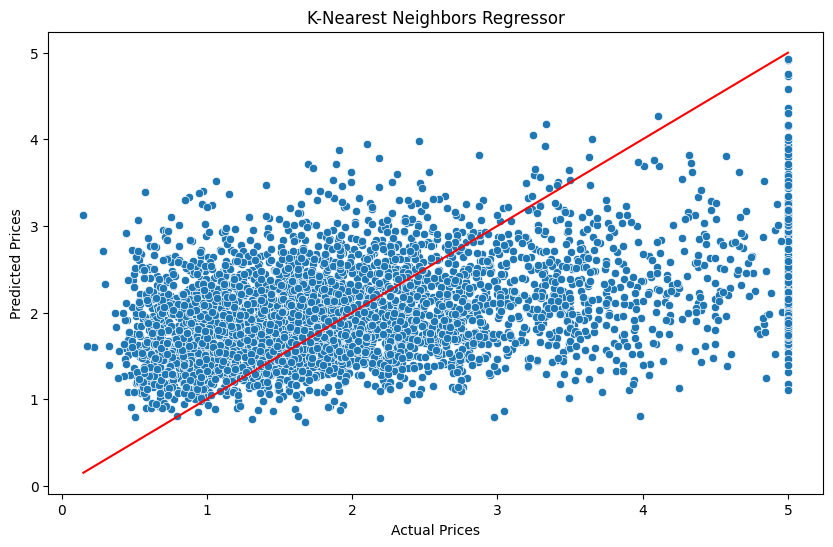

In [ ]:
# K-Nearest Neighbors Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)
print(f'KNN Regressor MSE: {mean_squared_error(y_test, y_pred)}')
plot_predictions(y_test, y_pred, 'K-Nearest Neighbors Regressor')

PCA + Linear Regression MSE: 1.1460576589739366


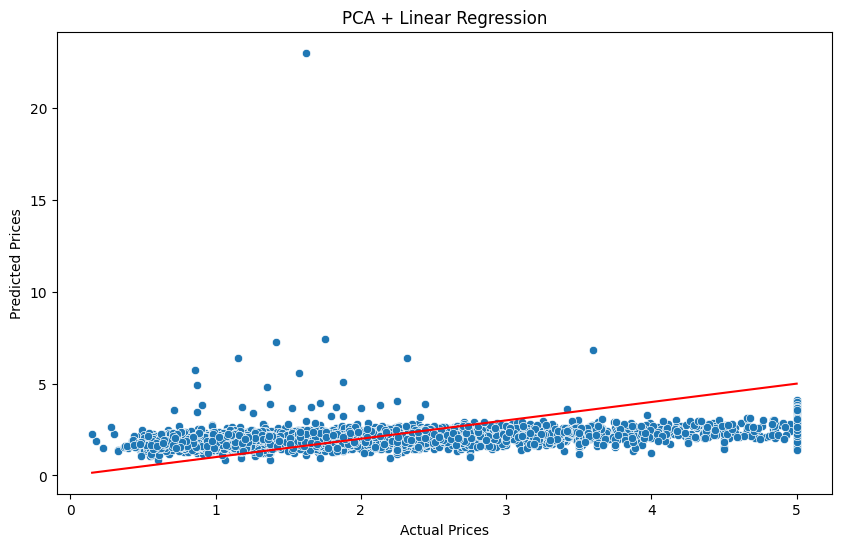

In [ ]:
# PCA + Linear Regression
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
lin_reg.fit(X_train_pca, y_train)
y_pred = lin_reg.predict(X_test_pca)
print(f'PCA + Linear Regression MSE: {mean_squared_error(y_test, y_pred)}')
plot_predictions(y_test, y_pred, 'PCA + Linear Regression')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network MSE: 0.28518608587665945


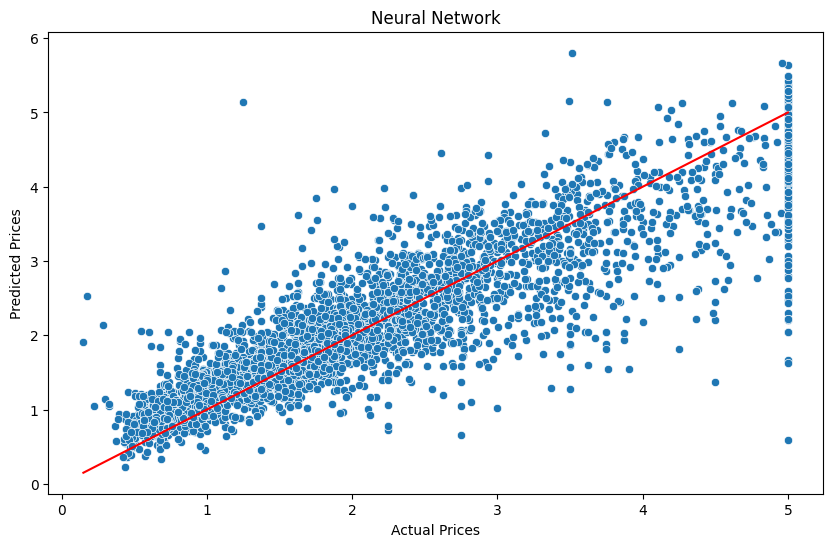

In [ ]:
# Neural Network
# Normalize the data
X_train_norm = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_norm = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
model.fit(X_train_norm, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model
y_pred = model.predict(X_test_norm).flatten()
print(f'Neural Network MSE: {mean_squared_error(y_test, y_pred)}')
plot_predictions(y_test, y_pred, 'Neural Network')